In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
sns.set_style("white")

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url, header = None, sep = ",")
wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine.head(5)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Etape 1 : Séparer les données et centrée réduire les données quantitaives

In [5]:
wine2 = scale(wine.drop(columns = "class"))

Etape 2 : Réaliser l'ACP

In [6]:
# 13 : nombre de variable quanti
pca = PCA(n_components = 13)
pca.fit(wine2)

PCA(n_components=13)

Les valeurs propres associées à chaque axe factoriel

In [7]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(13)], #13 : le nombre de variables dans l'acp
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.732437,36.0,36.0
1,Dim2,2.511081,19.0,55.0
2,Dim3,1.454242,11.0,67.0
3,Dim4,0.924166,7.0,74.0
4,Dim5,0.858049,7.0,80.0
5,Dim6,0.645282,5.0,85.0
6,Dim7,0.554141,4.0,89.0
7,Dim8,0.350466,3.0,92.0
8,Dim9,0.290512,2.0,94.0
9,Dim10,0.252320,2.0,96.0


Etape 3 choisir le nombre d'axes factorielle (code pour avoir les deux en 1)

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


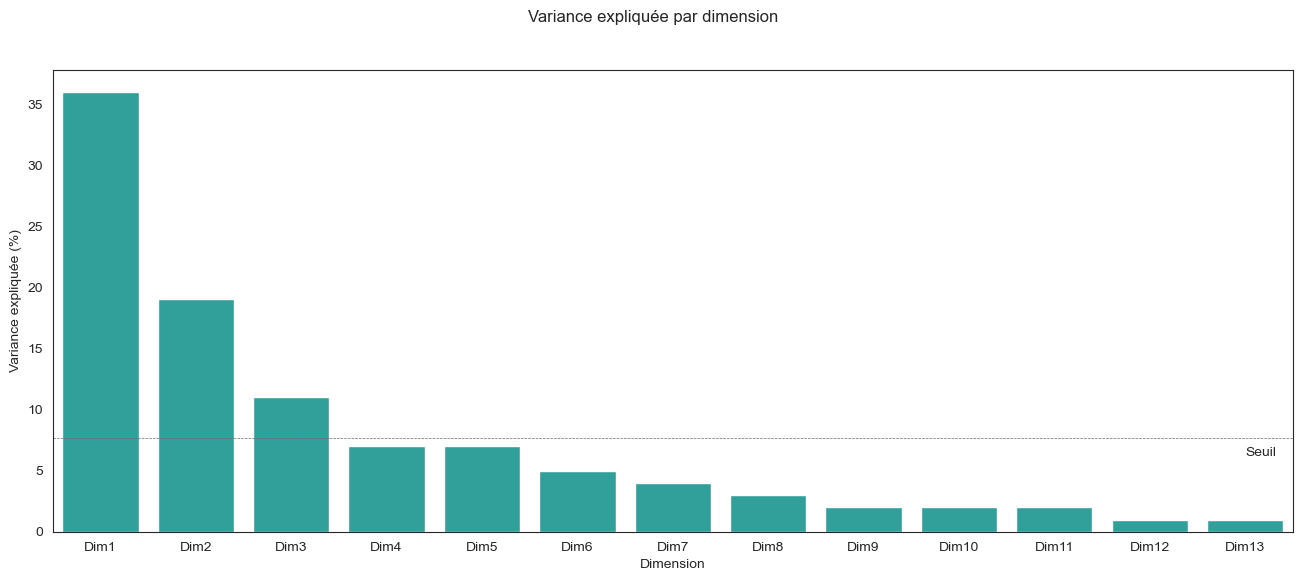

In [8]:
plt.figure(figsize=(16, 6))
g_eig = sns.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.axhline(y = 100/13, linewidth = .5, color = "dimgray", linestyle = "--") # 100/nombre de variable(axe factoriel)
plt.text(12, 100/16, "Seuil") # Mettre le texte juste en dessous
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

Commentaire  : 
Nous pouvons retenir que nos trois premiers axes factoriels ont des valeurs propres supérieur à 1. D'après la règle de Kaiser, nous serons tentés de retenir les trois premiers axes factories. Ils permettent d'expliquer 67% de la variance totale de nos données. Cela signifie que 67% des informations contenues dans notre dataset sont contenues dans nos trois premiers axes factoriels.

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


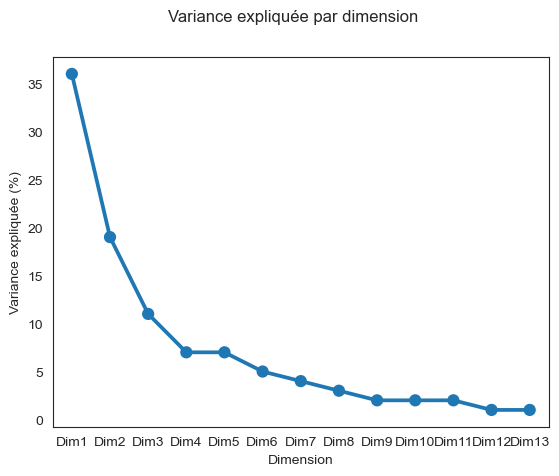

In [9]:
g_eig = sns.pointplot(x = "Dimension", 
                          y = "% variance expliquée",
                          data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

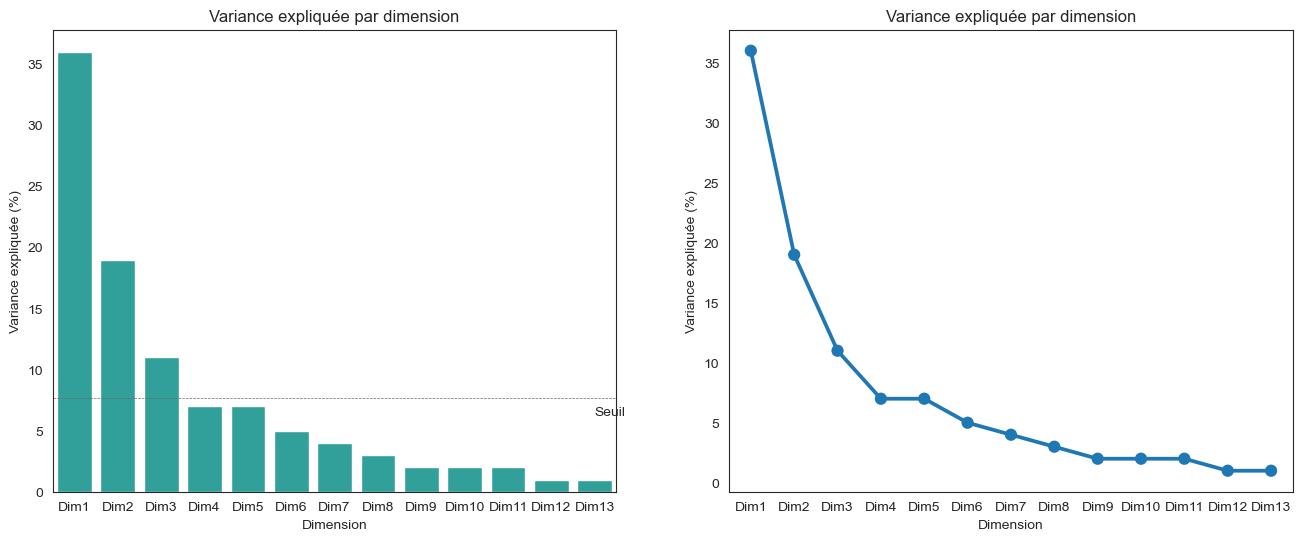

In [10]:
# Créez la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Premier graphique (à gauche)
sns.barplot(x="Dimension", y="% variance expliquée", palette=["lightseagreen"], data=eig, ax=ax1)
ax1.axhline(y=100/13, linewidth=0.5, color="dimgray", linestyle="--")
ax1.text(12, 100/16, "Seuil")
ax1.set(ylabel="Variance expliquée (%)")
ax1.set_title("Variance expliquée par dimension")

# Deuxième graphique (à droite)
sns.pointplot(x="Dimension", y="% variance expliquée", data=eig, ax=ax2)
ax2.set(ylabel="Variance expliquée (%)")
ax2.set_title("Variance expliquée par dimension")

# Affichez la figure
plt.show()


## Aprécier la contributions de chaque variables aux axes factoriels

In [11]:
coordinates = pca.components_.T
eigenvalues = pca.explained_variance_
contributions_axis1 = (coordinates[:, 0] ** 2) / eigenvalues[0]
contributions_axis2 = (coordinates[:, 1] ** 2) / eigenvalues[1]
contributions_axis3 = (coordinates[:, 2] ** 2) / eigenvalues[2]

# Créez un DataFrame pour afficher les contributions
contributions_df = pd.DataFrame({
    'Variable': wine.drop(columns = "class").columns,
    'Contribution_Axe1': contributions_axis1,
    'Contribution_Axe2': contributions_axis2,
    'Contribution_Axe3': contributions_axis3,
})

contributions_df.sort_values(by = ["Contribution_Axe1", "Contribution_Axe2", "Contribution_Axe3"], ascending=[False, False, False])

,Variable,Contribution_Axe1,Contribution_Axe2,Contribution_Axe3
6,Flavanoids,3.779732e-02,0.000004,0.015613
5,Total phenols,3.291268e-02,0.001685,0.014694
11,OD280/OD315 of diluted wines,2.990043e-02,0.010776,0.018950
8,Proanthocyanins,2.075845e-02,0.000615,0.015360
7,Nonflavanoid phenols,1.883216e-02,0.000330,0.019959
10,Hue,1.860342e-02,0.031051,0.004994
12,Proline,1.737516e-02,0.053027,0.011047
1,Malic acid,1.270317e-02,0.020148,0.005448
3,Alcalinity of ash,1.210249e-02,0.000045,0.257620
0,Alcohol,4.401744e-03,0.093155,0.029574


In [12]:
coordvar = pca.components_.T * np.sqrt(pca.explained_variance_)
coordvar_df = pd.DataFrame(coordvar, columns=['PC'+str(i+1) for i in range(13)], index=wine.columns[1:])

C:\Users\Paqua\AppData\Local\Temp\ipykernel_75372\3332613313.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size = 25)
C:\Users\Paqua\AppData\Local\Temp\ipykernel_75372\3332613313.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color = "gray", linestyle = 'dashed')


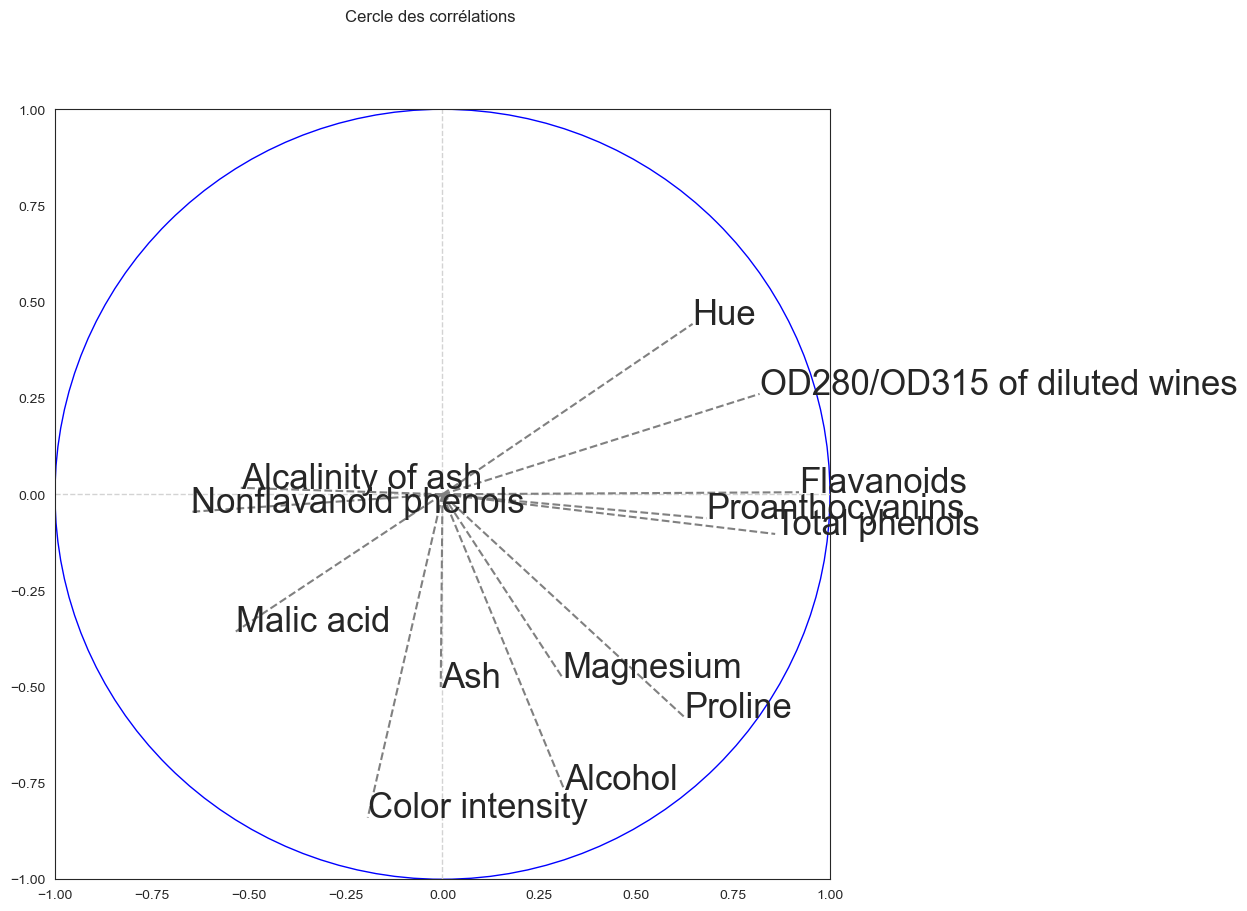

In [13]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(13):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

## Si je connais les classes

In [14]:
wine_pca = pd.DataFrame(pca.transform(wine2), 
                               columns = ["Dim" + str(i+1) for i in range(13)]) \
                    .assign(Class = wine["class"])

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

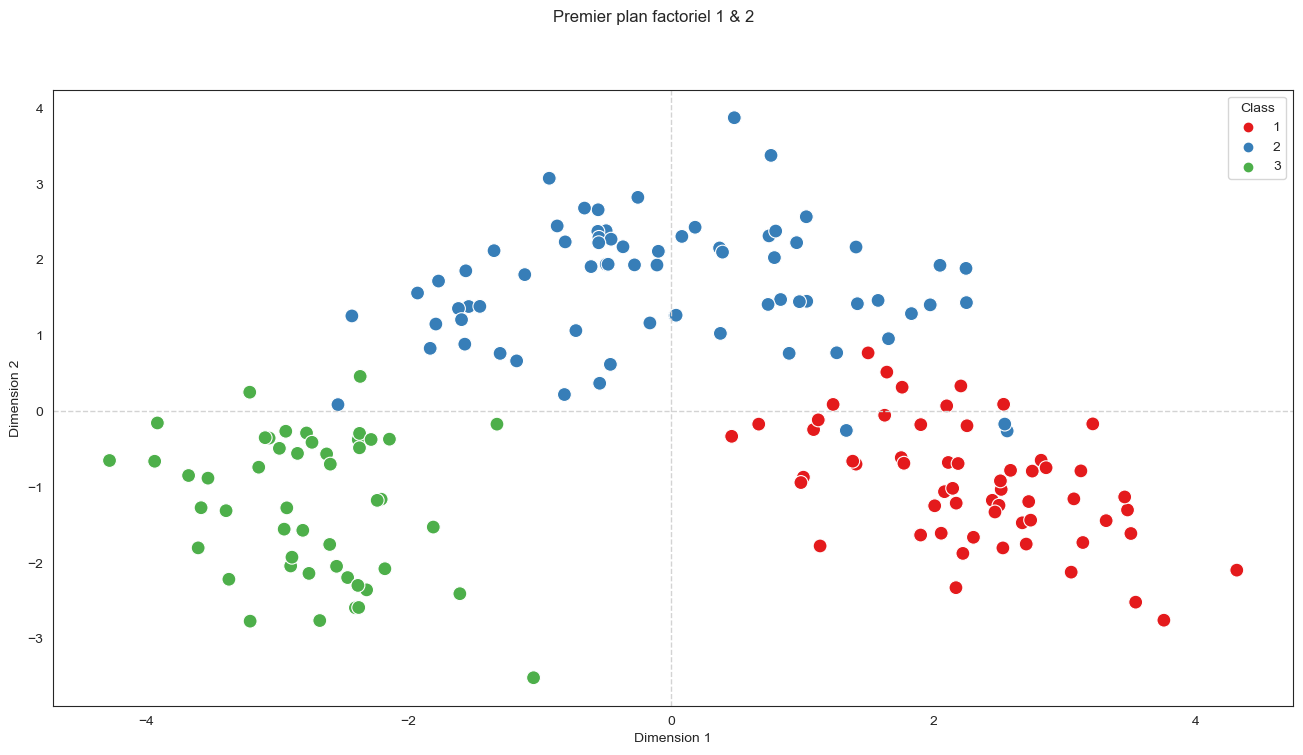

In [20]:
fig, axes = plt.subplots(figsize = (16, 8))
fig.suptitle("Premier plan factoriel 1 & 2")
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)

g_pca = sns.scatterplot(x = "Dim1", y = "Dim2", hue = "Class", data = wine_pca, 
                            palette = "Set1", s = 100)
g_pca.set(xlabel = "Dimension 1", ylabel = "Dimension 2")

plt.show()